In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

In [3]:
train_df = pd.read_csv('sign_mnist_train.csv')
train_df = train_df.sample(frac = 1, random_state=42)
X, y = train_df.drop('label', axis = 1), train_df['label']
X.shape, y.shape
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [4]:
label_bi = LabelBinarizer()
y = label_bi.fit_transform(y)
X = X / 255.0
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [5]:
X = tf.reshape(X, [-1, 28, 28, 1])
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [7]:
X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]
X_train[0].dtype
X_train[0].shape

<dtype: 'float64'>


TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x1bd292f7160>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

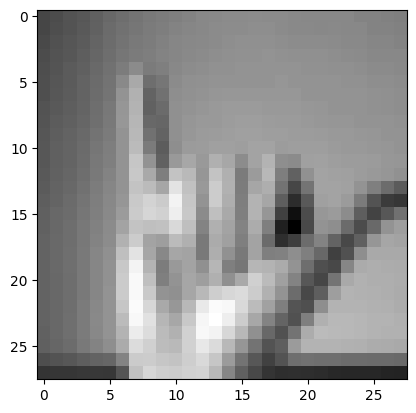

In [10]:
plt.imshow(X[0], cmap = 'gray'), y[0]

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5,5), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(24, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
save_best_cb = keras.callbacks.ModelCheckpoint('sign_language.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [22]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid), callbacks = [save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 [==============================] - 34s 43ms/step - loss: 4.0762e-06 - accuracy: 1.0000 - val_loss: 4.1181e-06 - val_accuracy: 1.0000
Epoch 2/20
782/782 [==============================] - 34s 43ms/step - loss: 2.3388e-06 - accuracy: 1.0000 - val_loss: 2.5075e-06 - val_accuracy: 1.0000
Epoch 3/20
782/782 [==============================] - 34s 43ms/step - loss: 1.4747e-06 - accuracy: 1.0000 - val_loss: 1.5148e-06 - val_accuracy: 1.0000
Epoch 4/20
782/782 [==============================] - 34s 43ms/step - loss: 9.5466e-07 - accuracy: 1.0000 - val_loss: 9.3530e-07 - val_accuracy: 1.0000
Epoch 5/20
782/782 [==============================] - 34s 43ms/step - loss: 6.3199e-07 - accuracy: 1.0000 - val_loss: 7.1947e-07 - val_accuracy: 1.0000
Epoch 6/20
782/782 [==============================] - 34s 43ms/step - loss: 4.1926e-07 - accuracy: 1.0000 - val_loss: 4.7800e-07 - val_accuracy: 1.0000
Epoch 7/20
782/782 [==============================] - 34s 43ms/step - loss: 2.7657e-07 -

In [33]:
history.history

{'loss': [4.076199729752261e-06,
  2.3388029148918577e-06,
  1.4747000705028768e-06,
  9.54655206442112e-07,
  6.319929184428474e-07,
  4.192568496819149e-07,
  2.765740134691441e-07,
  1.9061523914842837e-07,
  1.284740562823572e-07,
  8.685582031375816e-08,
  6.470675373293489e-08,
  4.51326123140916e-08,
  3.0603402478845965e-08,
  2.1867750277237974e-08,
  1.5668867092699656e-08,
  1.1897085983036959e-08,
  8.583068478174027e-09,
  6.38008046394134e-09,
  4.8398969276775006e-09,
  3.809928816878028e-09],
 'accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [4.118094693694729e-06,
  2.507522367523052e-06,
  1.514788777967624e-06,
  9.35300420223939e-07,
  7.194676641120168e-07,
  4.779966502610478e-07,
  3.016873222350114e-07,
  2.085542973873089e-07,
  1.619875291680728e-07,
  1.1571253821784921e-07,
  7.900321463694127e-08,
  6.516420114621724e-08,
  6.030826682490442e-

In [31]:
best_model = tf.keras.models.load_model('sign_language.h5')
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

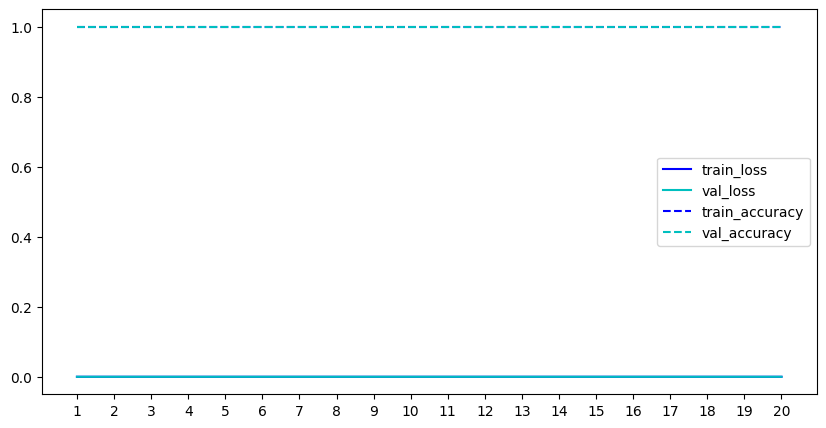

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(history.history['loss'])
ax.plot(range(1, n_epochs+1), history.history['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), history.history['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), history.history['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), history.history['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [44]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis = 1), test_df['label']
X_test = tf.reshape(X_test, [-1, 28, 28, 1])
y_test = label_bi.transform(y_test)
best_model.evaluate(X_test, y_test)

225/225 [==============================] - 3s 11ms/step - loss: 162.1197 - accuracy: 0.9085


[162.11972045898438, 0.9085331559181213]

In [46]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

sentence = 'sign language'
for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [47]:
best_model.predict(X_test)

225/225 [==============================] - 3s 11ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [56]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed
    
    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '
    
    
    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 [==============================] - 0s 22ms/step
The actual sentence is "nice to meet you"
The predicted sentence is "nice to meet you"


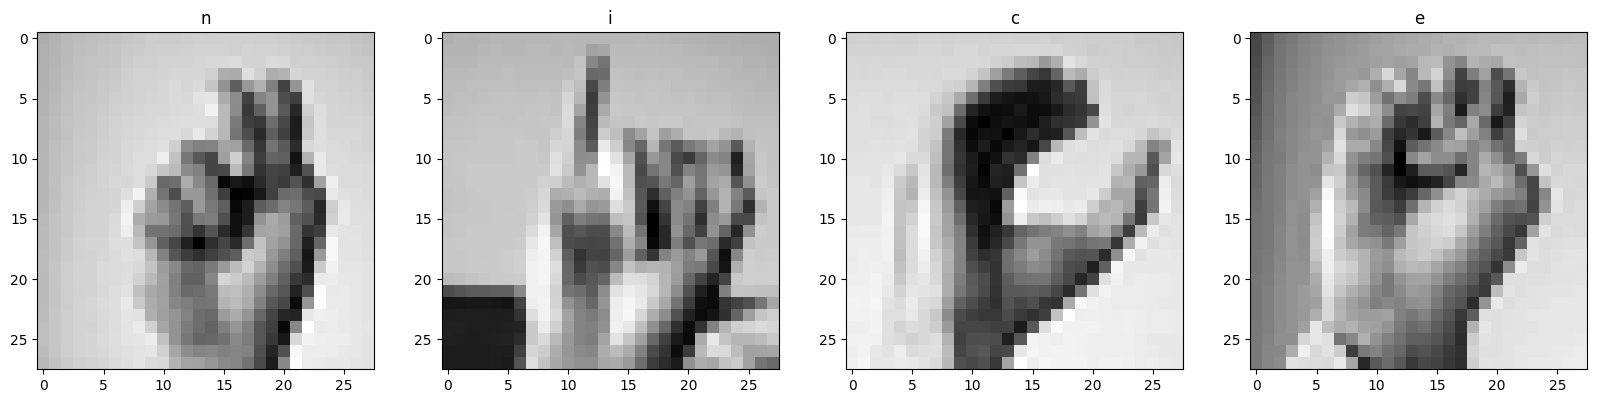

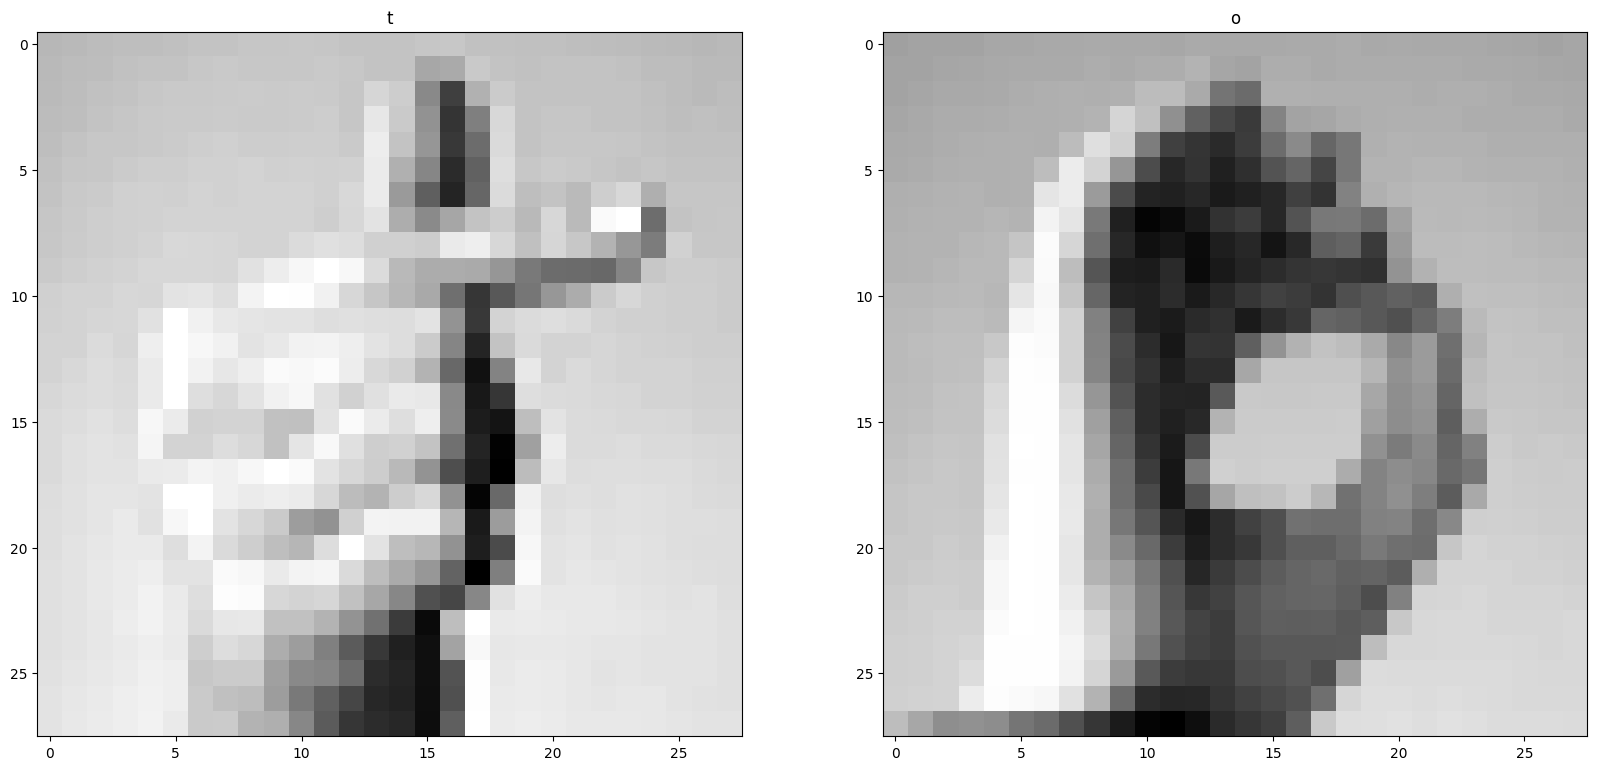

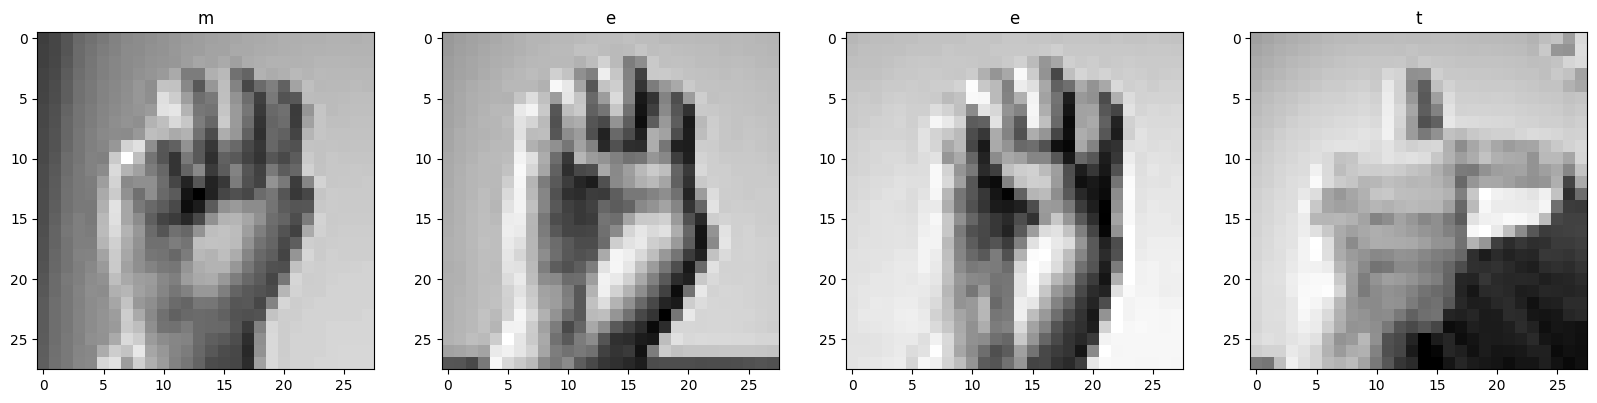

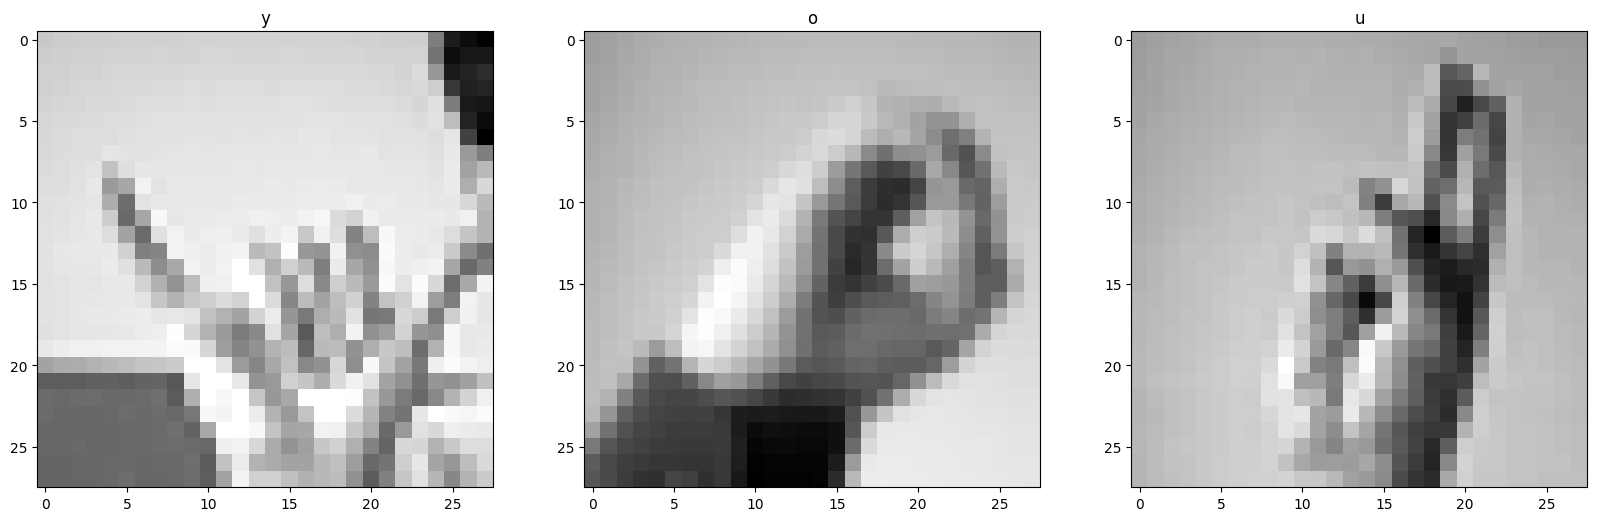

In [68]:
test_on_sentence(best_model, 'nice to meet you', test_df.drop('label', axis=1), test_df['label'], label_bi)